In [1]:
import plotly.graph_objects as go
import pandas as pd

# NCBI BioProject

## Demo

In [15]:
ncbi_bioproject_dict = {'PRJNA730823': {'title': 'Human Pangenome Reference Consortium',
                                        'type': 'Umbrella',
                                        'components':['PRJNA730822'],
                                        'umbrella-bioproject':'main'
                                        },
                        'PRJNA730822': {'title': 'HPRC Assembly',
                                        'type': 'Umbrella',
                                        'components': ['PRJNA727229'],
                                        'umbrella-bioproject':'PRJNA730823'
                                       },
                        'PRJNA727229' : {'title': 'Assembly of HG02257',
                                        'type': 'Umbrella',
                                         'components': ['PRJNA723016', 'PRJNA723017'],
                                         'umbrella-bioproject':'PRJNA730822'
                                        },
                        'PRJNA723016' : {'title': 'Homo sapiens alternate pseudohaplotype genome sequencing',
                                        'type': 'Genome Sequencing',
                                         'description': 'Assembly of HG02257 Paternal Haplotype',
                                         'assembly_level':'Contigs',
                                         'umbrella-bioproject':'PRJNA727229'
                                        },
                        'PRJNA723017' : {'title': 'Homo sapiens principal pseudohaplotype genome sequencing',
                                        'type': 'Genome Sequencing',
                                         'description': 'Assembly of HG02257 Maternal Haplotype',
                                         'assembly_level':'Scaffold',
                                         'umbrella-bioproject':'PRJNA727229'
                                        }
                        }
                       

[{'source': 0, 'target': 1, 'value': 1}, {'source': 1, 'target': 2, 'value': 1}, {'source': 2, 'target': 3, 'value': 1}, {'source': 2, 'target': 4, 'value': 1}]


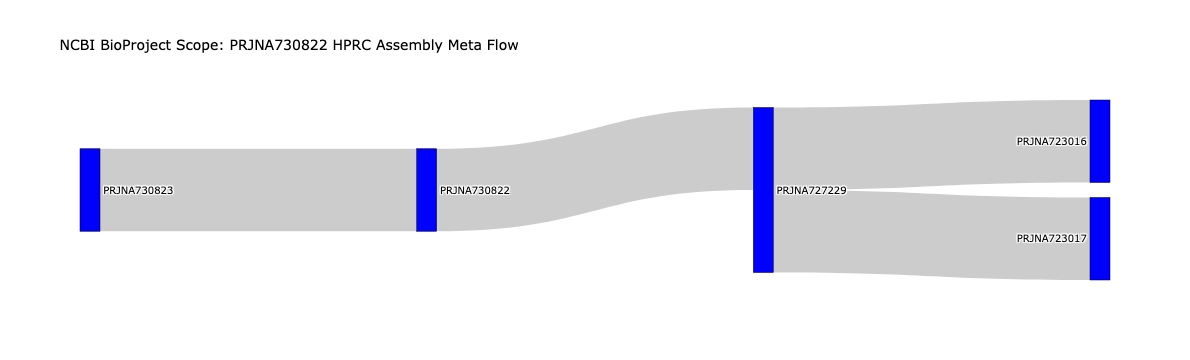

In [16]:

# Create a dictionary to map node names to indices
node_indices = {node: idx for idx, node in enumerate(ncbi_bioproject_dict.keys())}

# Create links for the Sankey diagram
links = []
for key, val in ncbi_bioproject_dict.items():
    if 'components' in val:
        source = node_indices[key]
        for component in val['components']:
            target = node_indices[component]
            links.append({'source': source, 'target': target, 'value': 1})
print(links)
# Create nodes for the Sankey diagram
nodes = [{'label': key} for key in ncbi_bioproject_dict.keys()]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['label'] for node in nodes],
        color="blue",  # Set node color to blue
        # font=dict(color="black")  # Set node label font color to black
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Update layout
fig.update_layout(
    title="NCBI BioProject Scope: PRJNA730822 HPRC Assembly Meta Flow",
    font=dict(size=10, color="black"),
    plot_bgcolor="black",
)

# Save the figure to an HTML file
fig.write_html("PRJNA730822-SankeyNetwork.html")
fig.show()

In [12]:
pd.DataFrame.from_dict(ncbi_bioproject_dict, orient='index')

,title,type,components,umbrella-bioproject,description,assembly_level
PRJNA730823,Human Pangenome Reference Consortium,Umbrella,[PRJNA730822],main,NaN,NaN
PRJNA730822,HPRC Assembly,Umbrella,[PRJNA727229],PRJNA730823,NaN,NaN
PRJNA727229,Assembly of HG02257,Umbrella,"[PRJNA723016, PRJNA723017]",PRJNA730822,NaN,NaN
PRJNA723016,Homo sapiens alternate pseudohaplotype genome ...,Genome Sequencing,NaN,PRJNA727229,Assembly of HG02257 Paternal Haplotype,Contigs
PRJNA723017,Homo sapiens principal pseudohaplotype genome ...,Genome Sequencing,NaN,PRJNA727229,Assembly of HG02257 Maternal Haplotype,Scaffold


## Minimal Viable Product

In [185]:
ncbi_bioproject_dict = {'PRJNA730823': {'title': 'Human Pangenome Reference Consortium',
                                        'type': 'Umbrella',
                                        'components':['PRJNA730822'],
                                        'umbrella-bioproject':'main',
                                        'Description': 'The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'
                                        },
                        'PRJNA730822': {'title': 'HPRC Assembly',
                                        'type': 'Umbrella',
                                        'components': ['Bioproject-Assembly-Trio', 'Bioproject-Assembly-HiC-Phased'],
                                        'umbrella-bioproject':'PRJNA730823',
                                        'Description': 'This project contains assemblies generated for the Human Pangenome Reference Consortium (HPRC). The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'
                                       },
                        
                        'Bioproject-Assembly-Trio':{'title': 'Assembly of HG00621',
                                               'type':'Umbrella',
                                               'components':['Bioproject-Assembly-DataLevel-Maternal',
                                                            'Bioproject-Assembly-DataLevel-Paternal'],
                            'umbrella-bioproject': 'PRJNA730822',
                            'Description':'HG00621 assembly generated by the Human Pangenome Reference Consortium'},
                        
                        'Bioproject-Assembly-DataLevel-Maternal':{'title': 'Assembly of HG00621 Maternal Haplotype',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-Trio',
                            'Description':'HG00621 maternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'},
                        
                        'Bioproject-Assembly-DataLevel-Paternal':{'title': 'Assembly of HG00621 Paternal Haplotype',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-Trio',
                            'Description':'HG00621 paternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'},



                        'Bioproject-Assembly-HiC-Phased':{'title': 'Assembly of NA20905',
                                               'type':'Umbrella',
                                               'components':['Bioproject-Assembly-DataLevel-Haplotype1',
                                                            'Bioproject-Assembly-DataLevel-Haplotype2'],
                            'umbrella-bioproject': 'PRJNA730822',
                            'Description':'NA20905 assembly generated by the Human Pangenome Reference Consortium.'},
                        
                        'Bioproject-Assembly-DataLevel-Haplotype1':{'title': 'Assembly of NA20905 Haplotype 1',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-HiC-Phased',
                            'Description':'NA20905 haplotype1 assembly generated by the Human Pangenome Reference Consortium using hic phasing. Mitochondrial sequences are included in haplotype 2. For male samples, chrY sequences are included in haplotype 1 and chrX sequences are included in haplotype 2.'},
                        
                        'Bioproject-Assembly-DataLevel-Haplotype2':{'title': 'Assembly of NA20905 Haplotype 2',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-HiC-Phased',
                            'Description':'NA20905 haplotype 2 assembly generated by the Human Pangenome Reference Consortium using hic phasing. Mitochondrial sequences are included in haplotype 2. For male samples, chrY sequences are included in haplotype 1 and chrX sequences are included in haplotype 2.'}
                       
                       }

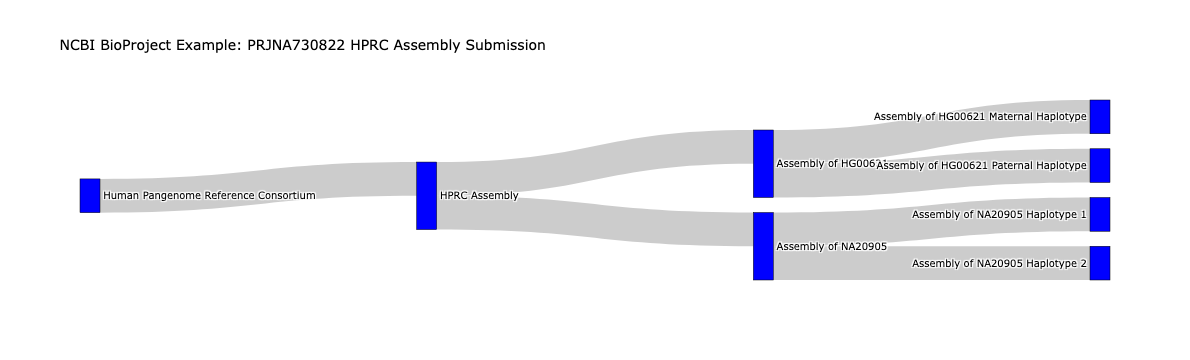

In [188]:
# Create dictionary to map node names to indices
node_indices = {node: idx for idx, node in enumerate(ncbi_bioproject_dict.keys())}

# Create links for the Sankey diagram
links = []
for key, val in ncbi_bioproject_dict.items():
    if 'components' in val:
        source = node_indices[key]
        for component in val['components']:
            target = node_indices[component]
            links.append({'source': source, 'target': target, 'value': 1})

# Create nodes for the Sankey diagram, including the descriptions
nodes = [{'name': key, 'label': val['title'], 'Description': val['Description']} for key, val in ncbi_bioproject_dict.items()]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['label'] for node in nodes],
        color="blue",
        customdata=[node['Description'] for node in nodes],  # Adding custom data for hover
        hovertemplate='%{label}<br>%{customdata}<extra></extra>'  # Custom hover template using the label and custom data
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Update layout
fig.update_layout(
    title="NCBI BioProject Example: PRJNA730822 HPRC Assembly Submission",
    font=dict(size=10, color="black"),
    plot_bgcolor="white",
)

fig.show()

## Scale

In [94]:
bioproject_df = pd.read_csv('../ncbi-bioproject/create-bioproject-identifiers/hprc-production-create-YR2_4-bioproject.tsv', sep='\t')

In [175]:
ncbi_bioproject_dict = {'PRJNA730823': {'title': 'Human Pangenome Reference Consortium',
                                        'type': 'Umbrella',
                                        'components':['PRJNA730822'],
                                        'umbrella-bioproject':'main',
                                        'Description': 'The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'
                                        },
                        'PRJNA730822': {'title': 'HPRC Assembly',
                                        'type': 'Umbrella',
                                        'components': [],
                                        'umbrella-bioproject':'PRJNA730823',
                                        'Description': 'This project contains assemblies generated for the Human Pangenome Reference Consortium (HPRC). The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'
                                       }
                       }


bioproject_trio_assembly_dict =  {'Bioproject-Assembly-Trio':{'title': 'Assembly of {sample_id}',
                                               'type':'Umbrella',
                                               'components':['Bioproject-Assembly-DataLevel-Maternal',
                                                            'Bioproject-Assembly-DataLevel-Paternal'],
                            'umbrella-bioproject': 'PRJNA730822',
                            'Description':'{sample_id} assembly generated by the Human Pangenome Reference Consortium'},
                        
                        'Bioproject-Assembly-DataLevel-Maternal':{'title': 'Assembly of {sample_id} Maternal Haplotype',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-Trio',
                            'Description':'{sample_id} maternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'},
                        
                        'Bioproject-Assembly-DataLevel-Paternal':{'title': 'Assembly of {sample_id} Paternal Haplotype',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-Trio',
                            'Description':'{sample_id} paternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'}
                            }


bioproject_hic_phased_assembly_dict = {'Bioproject-Assembly-HiC-Phased':{'title': 'Assembly of {sample_id}',
                                               'type':'Umbrella',
                                               'components':['Bioproject-Assembly-DataLevel-Haplotype1',
                                                            'Bioproject-Assembly-DataLevel-Haplotype2'],
                            'umbrella-bioproject': 'PRJNA730822',
                            'Description':'{sample_id} assembly generated by the Human Pangenome Reference Consortium.'},
                        
                        'Bioproject-Assembly-DataLevel-Haplotype1':{'title': 'Assembly of {sample_id} Haplotype 1',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-HiC-Phased',
                            'Description':'{sample_id} haplotype1 assembly generated by the Human Pangenome Reference Consortium using hic phasing. Mitochondrial sequences are included in haplotype 2. For male samples, chrY sequences are included in haplotype 1 and chrX sequences are included in haplotype 2.'},
                        
                        'Bioproject-Assembly-DataLevel-Haplotype2':{'title': 'Assembly of {sample_id} Haplotype 2',
                            'type': 'Genome sequencing and assembly',
                            'umbrella-bioproject': 'Bioproject-Assembly-HiC-Phased',
                            'Description':'{sample_id} haplotype 2 assembly generated by the Human Pangenome Reference Consortium using hic phasing. Mitochondrial sequences are included in haplotype 2. For male samples, chrY sequences are included in haplotype 1 and chrX sequences are included in haplotype 2.'}
                       
                       }


In [139]:
def create_bioproject_assembly_dict(bioproject_template_dict, sample_id):
    formatted_dict = {}
    for key, value in bioproject_template_dict.items():
        # Format the key
        formatted_key = key.format(sample_id=sample_id)
        formatted_dict[formatted_key] = {}

        # Format the values, which may be strings or lists
        for sub_key, sub_value in value.items():
            if isinstance(sub_value, str):
                formatted_dict[formatted_key][sub_key] = sub_value.format(sample_id=sample_id)
            elif isinstance(sub_value, list):
                # If it's a list, format each item in the list
                formatted_dict[formatted_key][sub_key] = [item.format(sample_id=sample_id) for item in sub_value]

    return formatted_dict

In [140]:
trio_sample_list = [trio_sample for trio_sample in bioproject_sample['Sample'].tolist() if trio_sample.startswith('NA')]

In [179]:

bioproject_assembly_list = []

bioproject_haplotype1_list = []
bioproject_haplotype2_list = []

bioproject_maternal_list = []
bioproject_paternal_list = []

for sample in bioproject_df['Sample'].tolist():
    biosample_accession = bioproject_df[bioproject_df['Sample'].isin([sample])].Accession.tolist()[0]
    
    if sample.startswith('NA'):
        
        sample_bioproject_dict = create_bioproject_assembly_dict(bioproject_hic_phased_assembly_dict, sample)
        
        sample_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-HiC-Phased'],orient='index').drop(labels=['components']).T
        sample_bioproject['Accession'] = biosample_accession
        sample_bioproject['Sample'] = sample
        sample_bioproject['Organism']= 'Homo sapiens'
        bioproject_assembly_list.append(sample_bioproject)

        sample_hap1_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-DataLevel-Haplotype1'], orient='index').T
        sample_hap1_bioproject['Accession'] = biosample_accession
        sample_hap1_bioproject['Sample'] = sample
        sample_hap1_bioproject['Organism']= 'Homo sapiens'
        bioproject_haplotype1_list.append(sample_hap1_bioproject)

        sample_hap2_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-DataLevel-Haplotype2'], orient='index').T
        sample_hap2_bioproject['Accession'] = biosample_accession
        sample_hap2_bioproject['Sample'] = sample
        sample_hap2_bioproject['Organism']= 'Homo sapiens'
        bioproject_haplotype2_list.append(sample_hap2_bioproject)
        
    
    else:
        
        sample_bioproject_dict = create_bioproject_assembly_dict(bioproject_trio_assembly_dict, sample)
        
        sample_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-Trio'],orient='index').drop(labels=['components']).T
        sample_bioproject['Accession'] = biosample_accession
        sample_bioproject['Sample'] = sample
        sample_bioproject['Organism']= 'Homo sapiens'
        bioproject_assembly_list.append(sample_bioproject)

        sample_maternal_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-DataLevel-Maternal'],orient='index').T
        sample_maternal_bioproject['Accession'] = biosample_accession
        sample_maternal_bioproject['Sample'] = sample
        sample_maternal_bioproject['Organism']= 'Homo sapiens'
        bioproject_maternal_list.append(sample_maternal_bioproject)


        sample_paternal_bioproject = pd.DataFrame.from_dict(sample_bioproject_dict['Bioproject-Assembly-DataLevel-Paternal'],orient='index').T
        sample_paternal_bioproject['Accession'] = biosample_accession
        sample_paternal_bioproject['Sample'] = sample
        sample_paternal_bioproject['Organism']= 'Homo sapiens'
        bioproject_paternal_list.append(sample_paternal_bioproject)

In [180]:
bioproject_assembly_df = pd.concat(bioproject_assembly_list)
bioproject_assembly_df.to_csv('../ncbi-bioproject/create-bioproject-identifiers/PRJNA730822-BioProject-Assemblies.tsv', sep='\t')

In [181]:
bioproject_maternal_df = pd.concat(bioproject_maternal_list)
bioproject_maternal_df.to_csv('../ncbi-bioproject/create-bioproject-identifiers/PRJNA730822-BioProject-Assemblies-DataLevel-Haplotype-Maternal.tsv', sep='\t')

In [182]:
bioproject_paternal_df = pd.concat(bioproject_paternal_list)
bioproject_paternal_df.to_csv('../ncbi-bioproject/create-bioproject-identifiers/PRJNA730822-BioProject-Assemblies-DataLevel-Haplotype-Paternal.tsv', sep='\t')

In [183]:
bioproject_hap1_df = pd.concat(bioproject_haplotype1_list)
bioproject_hap1_df.to_csv('../ncbi-bioproject/create-bioproject-identifiers/PRJNA730822-BioProject-Assemblies-DataLevel-Haplotype-1.tsv', sep='\t')

In [184]:
bioproject_hap2_df = pd.concat(bioproject_haplotype2_list)
bioproject_hap2_df.to_csv('../ncbi-bioproject/create-bioproject-identifiers/PRJNA730822-BioProject-Assemblies-DataLevel-Haplotype-2.tsv', sep='\t')

In [88]:
trio_sample_list = [trio_sample for trio_sample in bioproject_sample['Sample'].tolist() if trio_sample.startswith('NA')]

for trio_sample in trio_sample_list:
    ncbi_bioproject_dict.update(create_bioproject_assembly_dict(bioproject_hic_phased_assembly_dict, trio_sample))
    print(ncbi_bioproject_dict)
    break

{'PRJNA730823': {'title': 'Human Pangenome Reference Consortium', 'type': 'Umbrella', 'components': ['PRJNA730822'], 'umbrella-bioproject': 'main', 'Description': 'The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'}, 'PRJNA730822': {'title': 'HPRC Assembly', 'type': 'Umbrella', 'components': [], 'umbrella-bioproject': 'PRJNA730823', 'Description': 'This project contains assemblies generated for the Human Pangenome Reference Consortium (HPRC). The Human Pangenome Reference Consortium aims to create a collection of high-quality reference genomes that represent the genetic diversity of the human population.'}, 'Bioproject-Assembly-HiC-Phased-NA18522': {'title': 'Assembly of NA18522', 'type': 'Umbrella', 'components': ['Bioproject-Assembly-DataLevel-Haplotype1-', 'Bioproject-Assembly-DataLevel-Haplotype2'], 'umbrella-bioproject': 'PRJNA730822', 'Description': 'NA18522 assembly

In [81]:
create_bioproject_assembly_dict(bioproject_hic_phased_assembly_dict, 'NA20905')

{'Bioproject-Assembly-HiC-Phased-NA20905': {'title': 'Assembly of NA20905',
  'type': 'Umbrella',
  'components': ['Bioproject-Assembly-DataLevel-Haplotype1-',
   'Bioproject-Assembly-DataLevel-Haplotype2'],
  'umbrella-bioproject': 'PRJNA730822',
  'Description': 'NA20905 assembly generated by the Human Pangenome Reference Consortium.'},
 'Bioproject-Assembly-DataLevel-Haplotype1': {'title': 'Assembly of NA20905 Haplotype 1',
  'type': 'Genome sequencing and assembly',
  'umbrella-bioproject': 'Bioproject-Assembly-HiC-Phased-NA20905',
  'Description': 'NA20905 haplotype1 assembly generated by the Human Pangenome Reference Consortium using hic phasing. Mitochondrial sequences are included in haplotype 2. For male samples, chrY sequences are included in haplotype 1 and chrX sequences are included in haplotype 2.'},
 'Bioproject-Assembly-DataLevel-Haplotype2': {'title': 'Assembly of NA20905 Haplotype 2',
  'type': 'Genome sequencing and assembly',
  'umbrella-bioproject': 'Bioproject-Ass

In [82]:
create_bioproject_assembly_dict(bioproject_trio_assembly_dict, 'HG00621')

{'Bioproject-Assembly-Trio-HG00621': {'title': 'Assembly of HG00621',
  'type': 'Umbrella',
  'components': ['Bioproject-Assembly-DataLevel-Maternal',
   'Bioproject-Assembly-DataLevel-Paternal'],
  'umbrella-bioproject': 'PRJNA730822',
  'Description': 'HG00621 assembly generated by the Human Pangenome Reference Consortium'},
 'Bioproject-Assembly-DataLevel-Maternal': {'title': 'Assembly of HG00621 Maternal Haplotype',
  'type': 'Genome sequencing and assembly',
  'umbrella-bioproject': 'Bioproject-Assembly-Trio-HG00621',
  'Description': 'HG00621 maternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'},
 'Bioproject-Assembly-DataLevel-Paternal': {'title': 'Assembly of HG00621 Paternal Haplotype',
  'type': 'Genome sequencing and assembly',
  'umbrella-bioproject': 'Bioproject-Assembly-Trio-HG00621',
  'Description': 'HG00621 paternal assembly generated by the Human Pangenome Reference Consortium using trio phasing.'}}